In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('white')



In [2]:
mpg_data = pd.read_csv('data/auto-mpg.csv', na_values='?').dropna()
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


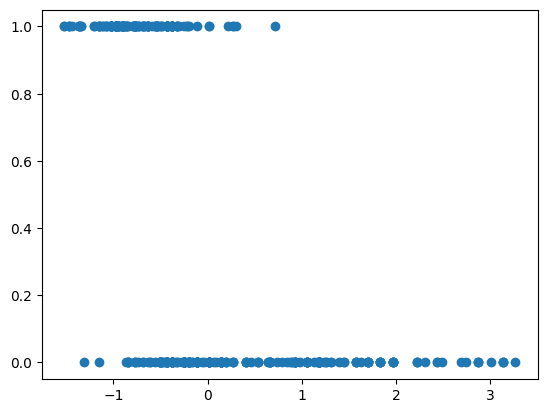

In [3]:
y = mpg_data['mpg'].values > 25
X = mpg_data[['weight', 'displacement', 'acceleration', 'horsepower']].values

X = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)
plt.scatter(X[:, 3], y)

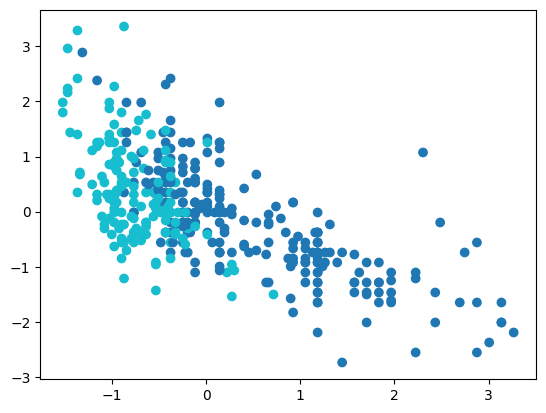

In [4]:
plt.scatter(X[:, 3], X[:, 2], c=y.astype(int), cmap="tab10")

In [8]:
def predict(x, w, b):
    return x[0] * w[0] + x[1] * w[1] + x[2] * w[2] + x[3] * w[3] + b

In [11]:
def predict(x, w, b):
    return np.dot(x, w) + b

In [19]:
w = np.ones((4,))
y_pred = predict(X, w, 0) > 0

In [29]:
accuracy = np.mean(y_pred == y)
accuracy


0.20153061224489796

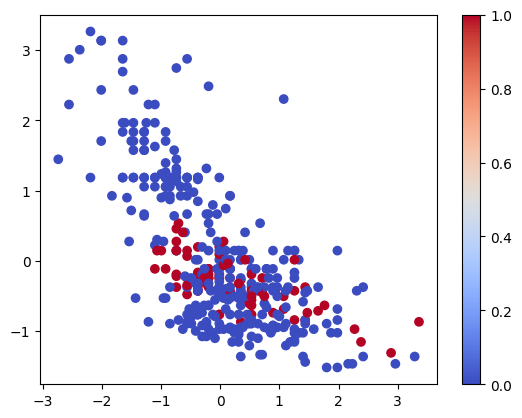

In [27]:
plt.scatter(X[:, 2], X[:, 3], c=y_pred == y, cmap='coolwarm')
plt.colorbar()


# Logistic regression



In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import autograd.numpy as np
mnist = tfds.image_classification.MNIST()
mnist.download_and_prepare()
data = tfds.as_numpy(mnist.as_dataset(split='train', as_supervised=True).batch(100000))
images, labels = next(iter(data))
images, labels = images[labels <= 1][:, :, :, 0].astype(float) / 128 - 1., labels[labels <= 1].astype(float)

In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import autograd.numpy as np
hh = tfds.image_classification.HorsesOrHumans()
hh.download_and_prepare()
data = tfds.as_numpy(hh.as_dataset(split='train', as_supervised=True).map(lambda x, y: (tf.image.resize(
tf.image.rgb_to_grayscale(x), (64, 64)), y)
).batch(100000))
images, labels = next(iter(data))
images, labels = images[labels <= 1][:, :, :, 0].astype(float) / 128 - 1., labels[labels <= 1].astype(float)

In [35]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import autograd.numpy as np
cd = tfds.image_classification.CatsVsDogs()
cd.download_and_prepare()
data = tfds.as_numpy(cd.as_dataset(split='train', as_supervised=True).map(lambda x, y: (tf.image.resize(
tf.image.rgb_to_grayscale(x), (64, 64)), y)
).batch(100000))
images, labels = next(iter(data))
images, labels = images[labels <= 1][:, :, :, 0].astype(float) / 128 - 1., labels[labels <= 1].astype(float)

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


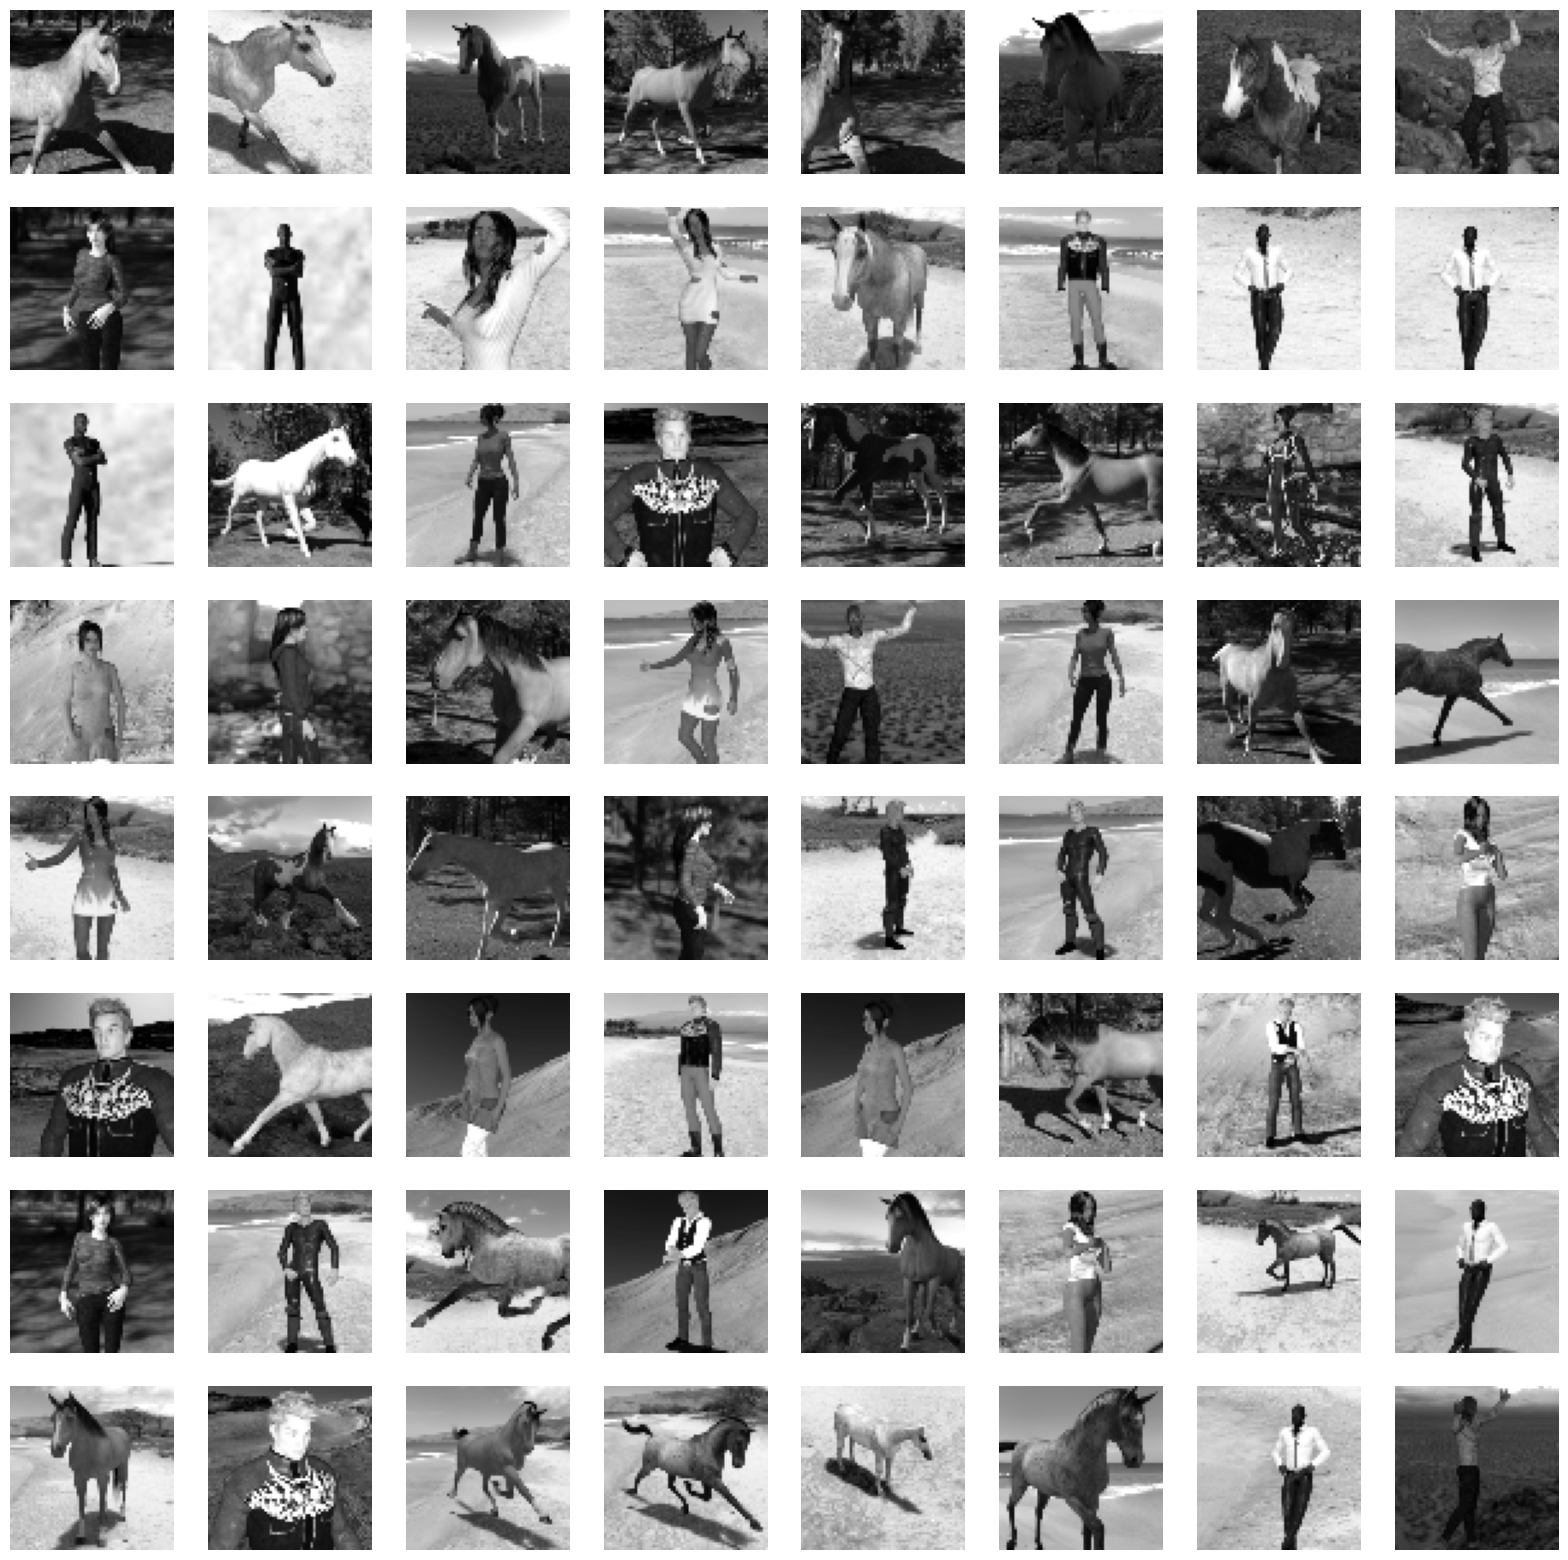

In [18]:
f, subplots = plt.subplots(8, 8, figsize=(20, 20))
i = 0
for row in subplots:
    for subplot in row:
        subplot.imshow(images[i], cmap='gray')
        subplot.axis('off')
        i += 1

In [19]:
print('Shape of images: ', images.shape)
print('Shape of labels:', labels.shape)

Shape of images:  (1027, 64, 64)
Shape of labels: (1027,)


In [36]:
X = images.reshape((images.shape[0], -1))
y = labels

print('Shape of X:', X.shape)
print('Shape of y:', X.shape)

Shape of X: (23262, 4096)
Shape of y: (23262, 4096)


In [21]:
w = np.zeros(X.shape[1] + 1)

In [22]:
def linear_function(X, w):
    w, b = w[:-1], w[-1]
    return np.dot(X, w) + b

def predict(X, w):
    return (linear_function(X, w) > 0).astype(float)

True label:  0.0  prediction:  0.0


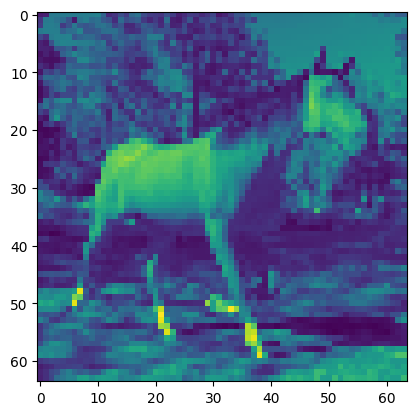

In [23]:
image = 3
plt.imshow(images[image])
print('True label: ', y[image], ' prediction: ', predict(X[image], w))

In [24]:
def accuracy(X, y, w):
    return np.mean(predict(X, w) == y)

print('Classifier accuracy: ', accuracy(X, y, w))

Classifier accuracy:  0.48685491723466406


In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_probability(X, w):
    return sigmoid(linear_function(X, w))


In [26]:
image = 4
print('True label: ', y[image], ' prediction: ', predict_probability(X[image], w))

True label:  0.0  prediction:  0.5


In [27]:
def nll(w, X, y):
    xw = linear_function(X, w)
    prob_correct = sigmoid((2 * y - 1) * xw)
    return -np.sum(np.log(prob_correct))

In [28]:
nll(w, X, y)

711.8621544350638

In [29]:
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def grad(w, X, y):
    xw = linear_function(X, w)
    signed_xw = (2 * y - 1) * xw
    prob_correct = sigmoid(signed_xw)
    dw = -np.dot((1 / prob_correct) * dsigmoid(signed_xw) * (2 * y - 1.), X)
    db = -np.sum((1 / prob_correct) * dsigmoid(signed_xw) * (2 * y - 1.))
    return np.concatenate([dw, np.atleast_1d(db)])

print(grad( w, X, y) /X.shape[0]) 

[-0.01946607 -0.01871726 -0.02047718 ... -0.02952198 -0.02973923
 -0.01314508]


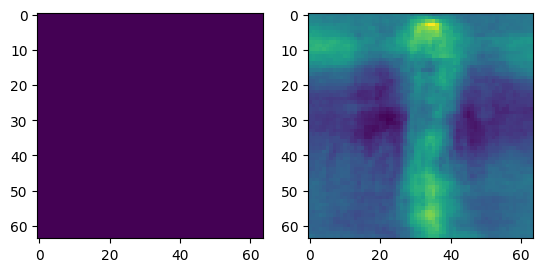

In [30]:
f, ax = plt.subplots(1, 2)
ax[0].cla(), ax[1].cla()
ax[0].imshow(w[:-1].reshape(images[0].shape))
ax[1].imshow(grad( w, X, y)[:-1].reshape(images[0].shape))

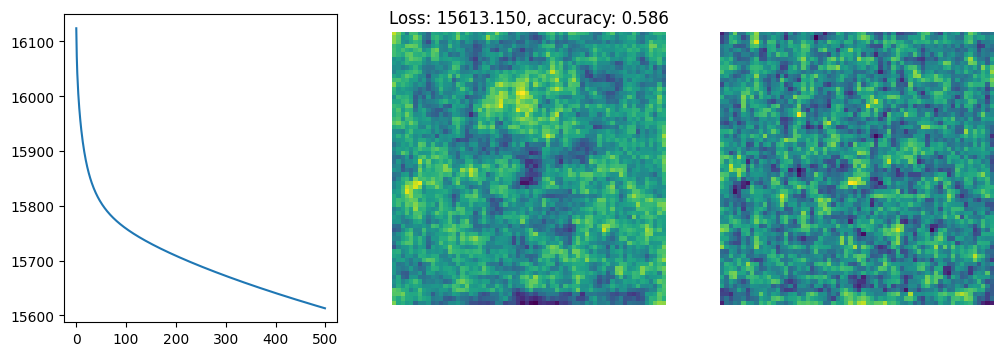

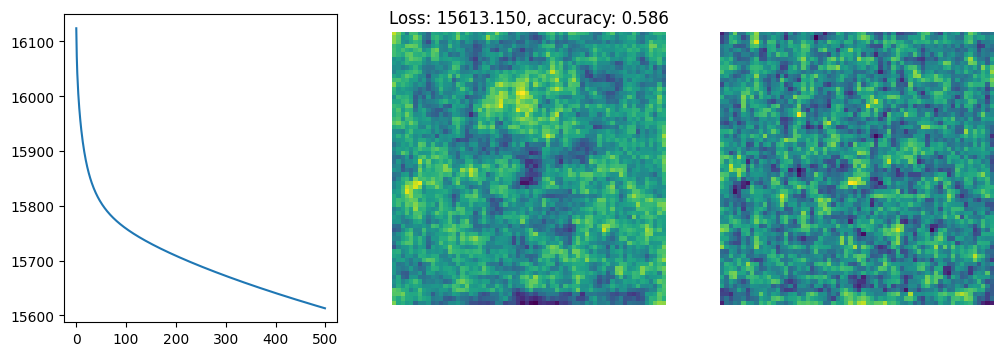

In [50]:
import time
from IPython import display

def nll_and_grad(w, X, y):
    return nll(w, X, y), grad(w, X, y)

def gradient_descent(value_and_grad, w0, lr, steps, X, y):
    f, ax = plt.subplots(1, 3, figsize=(12,4))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax]
        display.clear_output(wait =True)
        
        ax[1].axis('off')
        ax[2].axis('off')
        ax[0].plot(losses)
        ax[1].imshow(weights[:-1].reshape(images[0].shape))
        ax[2].imshow(g[:-1].reshape(images[0].shape))
        ax[1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))
        display.display(f)
        time.sleep(0.001)
        
        
        

    return weights, losses

w = np.zeros(X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, X, y)


0.6825294471670535


/Users/gabe/Documents/Courses/CS152-Neural-Networks-Fall-2023.github.io/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


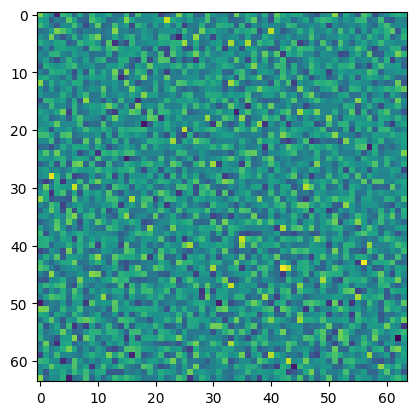

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None).fit(X, y)
print(model.score(X, y))
plt.imshow(model.coef_.reshape(images[0].shape))

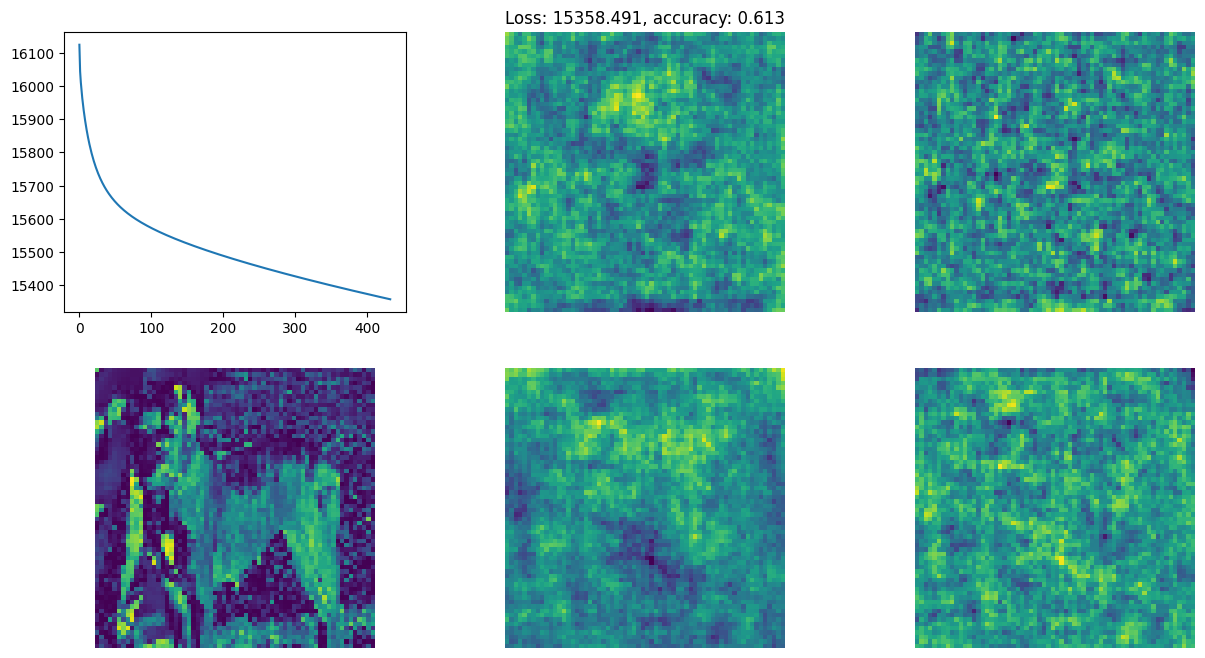

KeyboardInterrupt: 

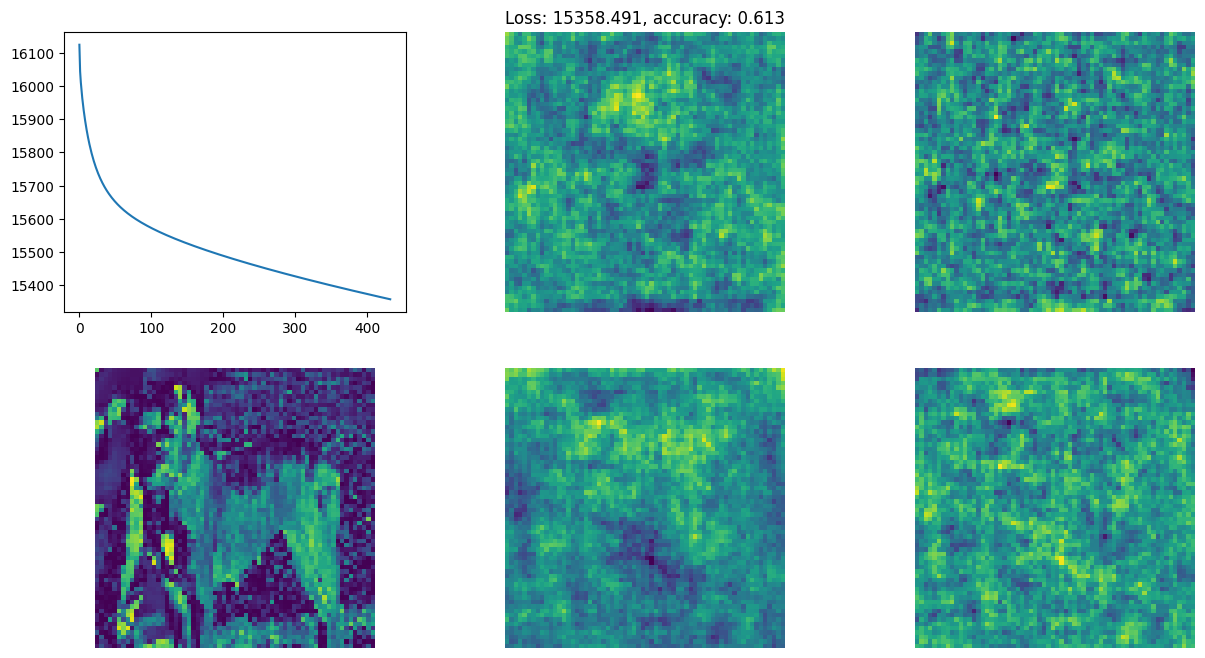

In [68]:
def gradient_descent(value_and_grad, w0, lr, steps, *args):
    f, ax = plt.subplots(2, 3, figsize=(15,8))
    X, y = args

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, *args)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax.flatten()]
        [a.axis('off') for a in ax.flatten()[1:]]
        display.clear_output(wait =True)
        
        ax[0, 0].plot(losses)
        dims = np.array(images[0].shape).prod()

        ax[0, 1].imshow(weights[:dims].reshape(images[0].shape))
        ax[0, 2].imshow(g[:dims].reshape(images[0].shape))
        ax[0, 1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))

        ax[1, 1].imshow(weights[dims:-1].reshape(images[0].shape))
        ax[1, 2].imshow(g[dims:-1].reshape(images[0].shape))
        ax[1, 0].imshow((images[0] ** 2) )
        display.display(f)
        time.sleep(0.001)
        
        
        

    return weights, losses

phi_X = np.concatenate([X, X ** 2], axis=1)
w = np.zeros(phi_X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, phi_X, y)
plt.plot(losses)

In [112]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import autograd.numpy as np
cd = tfds.image_classification.CatsVsDogs()
cd.download_and_prepare()

def preprocess(x):
    x = tf.image.resize(x, (128, 128)).numpy()
    x = hog(x, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=False, channel_axis=-1)
    return tf.tensor(x)

data = tfds.as_numpy(cd.as_dataset(split='train', as_supervised=True).map(lambda x, y: (tf.image.resize(x, (128, 128)), y)
).batch(100000))
images, labels = next(iter(data))
images, labels = images[labels <= 1], labels[labels <= 1].astype(float)

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


In [114]:
import tqdm.notebook as tqdm
X = np.stack([hog(xi, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=False, channel_axis=-1) for xi in tqdm.tqdm(images)])

  0%|          | 0/23262 [00:00<?, ?it/s]

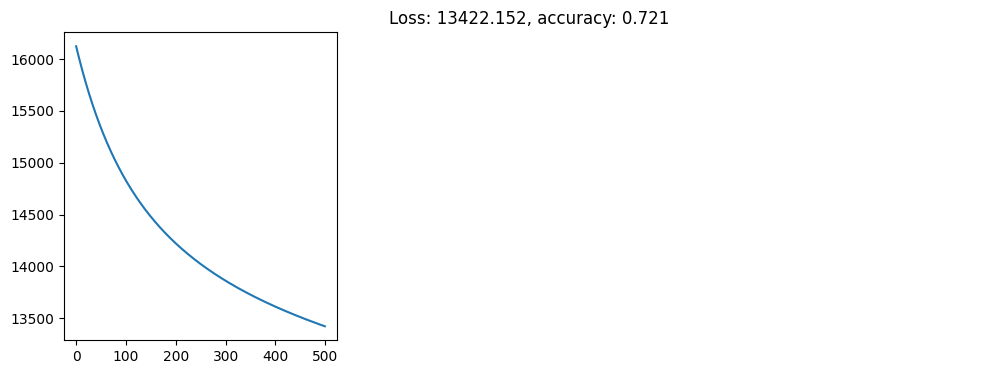

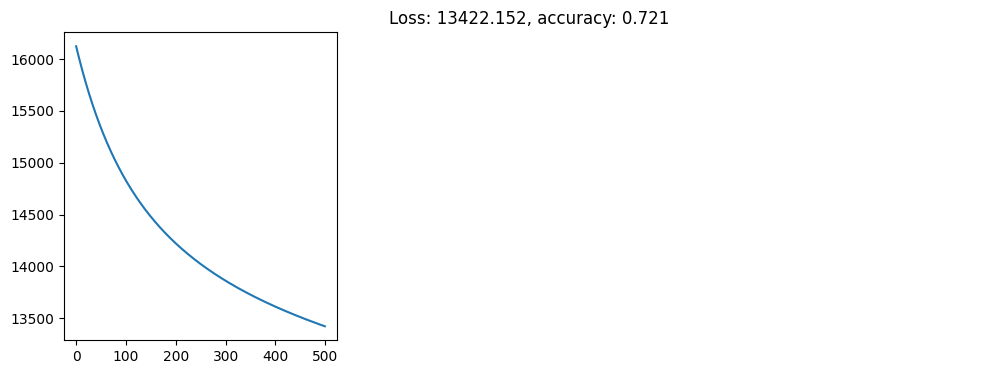

In [118]:
import time
from IPython import display

def nll_and_grad(w, X, y):
    return nll(w, X, y), grad(w, X, y)

def gradient_descent(value_and_grad, w0, lr, steps, X, y):
    f, ax = plt.subplots(1, 3, figsize=(12,4))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax]
        display.clear_output(wait =True)
        
        ax[1].axis('off')
        ax[2].axis('off')
        ax[0].plot(losses)
        #ax[1].imshow(weights[:-1].reshape(images[0].shape))
        #ax[2].imshow(g[:-1].reshape(images[0].shape))
        ax[1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))
        display.display(f)
        time.sleep(0.001)
        
        
        

    return weights, losses

w = np.zeros(X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, X, y)

In [ ]:
import time
from IPython import display

def nll_and_grad(w, X, y):
    return nll(w, X, y), grad(w, X, y)

def gradient_descent(value_and_grad, w0, lr, steps, X, y):
    f, ax = plt.subplots(1, 3, figsize=(12,4))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax]
        display.clear_output(wait =True)
        
        ax[1].axis('off')
        ax[2].axis('off')
        ax[0].plot(losses)
        ax[1].imshow(weights[:-1].reshape(images[0].shape))
        ax[2].imshow(g[:-1].reshape(images[0].shape))
        ax[1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))
        display.display(f)
        time.sleep(0.001)
        
        
        

    return weights, losses

w = np.zeros(X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, X, y)

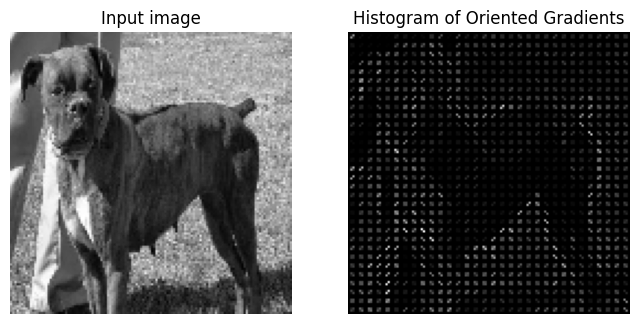

In [102]:

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(images[0][:, :, None], orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(images[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [104]:
64 * 64

4096

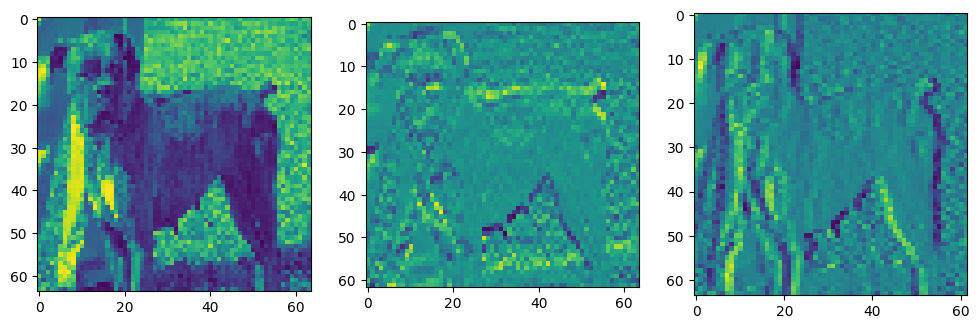

In [62]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
vedges = (images[:, :-2] - images[:, 2:])
hedges = (images[:, :, :-2] - images[:, :, 2:])

ax[0].imshow(images[0])
ax[1].imshow(vedges[0])
ax[2].imshow(hedges[0])

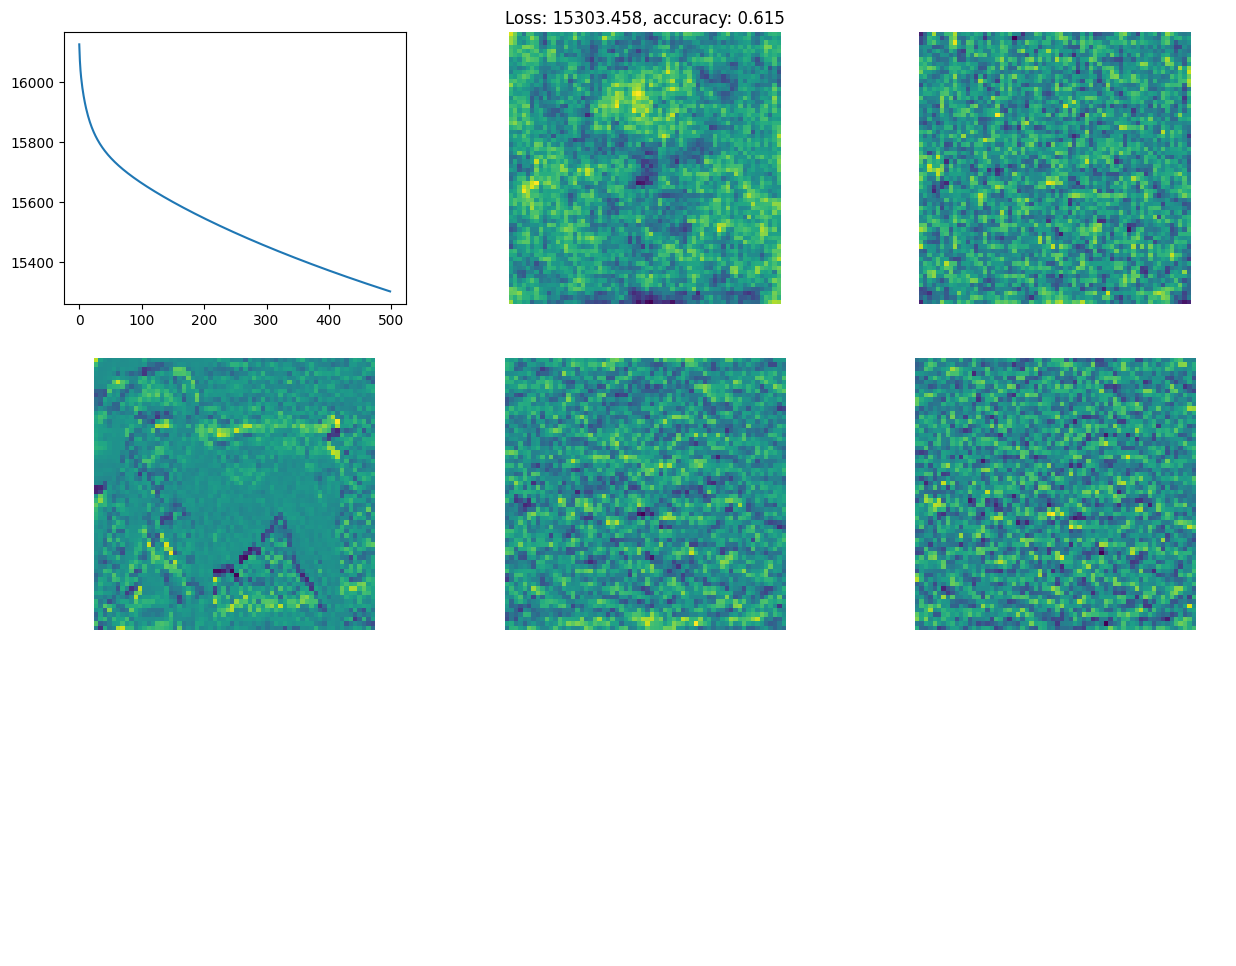

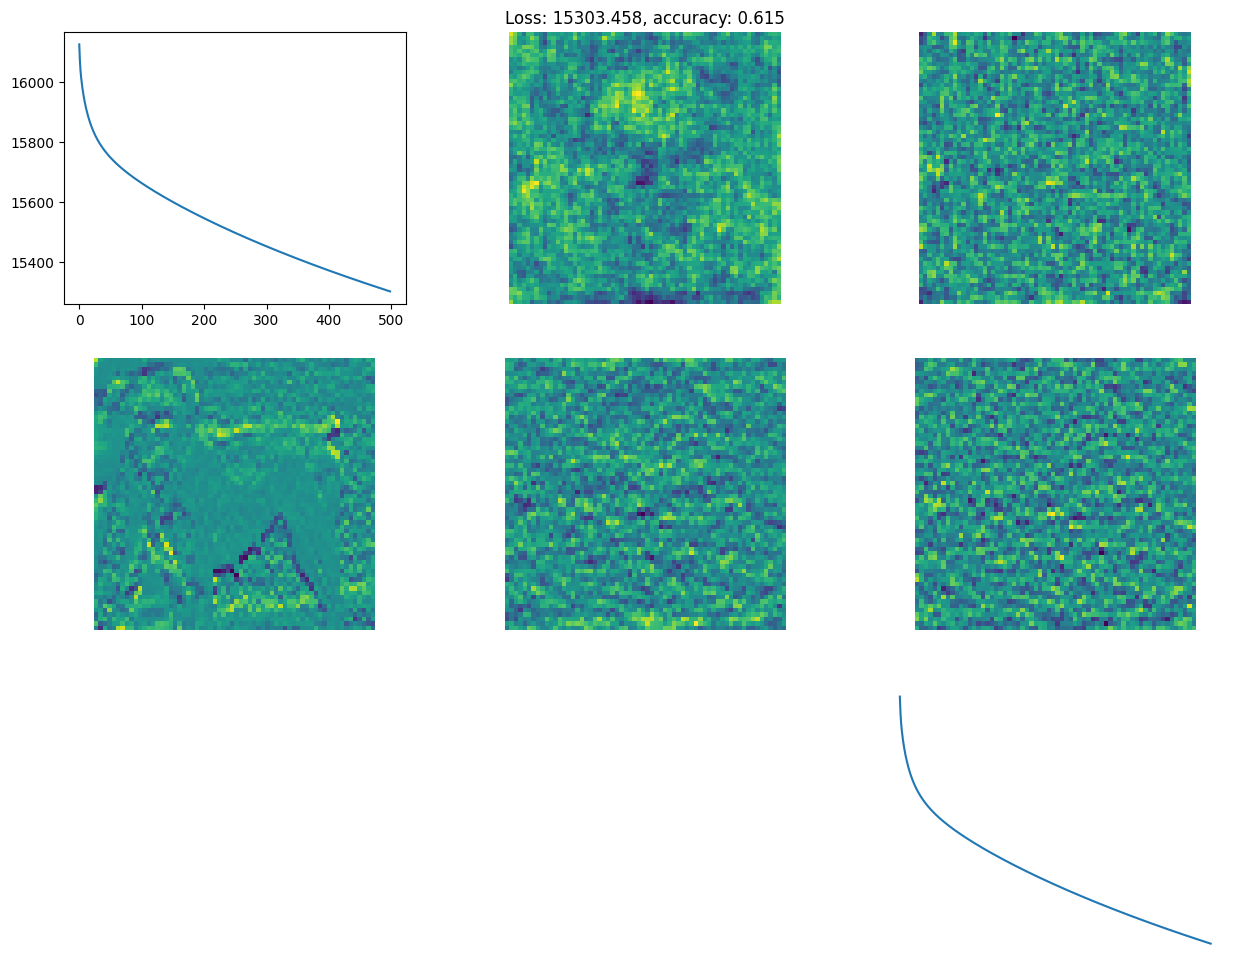

In [76]:
def gradient_descent(value_and_grad, w0, lr, steps, *args):
    f, ax = plt.subplots(3, 3, figsize=(15,12))
    X, y = args

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, *args)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        if i % 3 == 0:
            [a.cla() for a in ax.flatten()]
            [a.axis('off') for a in ax.flatten()[1:]]
            display.clear_output(wait =True)
            
            ax[0, 0].plot(losses)
            dims = np.array(images[0].shape).prod()
            vdims = np.array(vedges[0].shape).prod()

            ax[0, 1].imshow(weights[:dims].reshape(images[0].shape))
            ax[0, 2].imshow(g[:dims].reshape(images[0].shape))
            ax[0, 1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))

            ax[1, 1].imshow(weights[dims:(dims + vdims)].reshape(vedges[0].shape))
            ax[1, 2].imshow(g[dims:(dims + vdims)].reshape(vedges[0].shape))
            ax[1, 0].imshow((vedges[0]) )
            display.display(f)
            time.sleep(0.001)
        
    return weights, losses
phi_X = np.concatenate([X, vedges.reshape((X.shape[0], -1)), hedges.reshape((X.shape[0], -1))], axis=1)
w = np.zeros(phi_X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, phi_X, y)
plt.plot(losses)

In [119]:
from manim import *

Manim Community v0.17.3

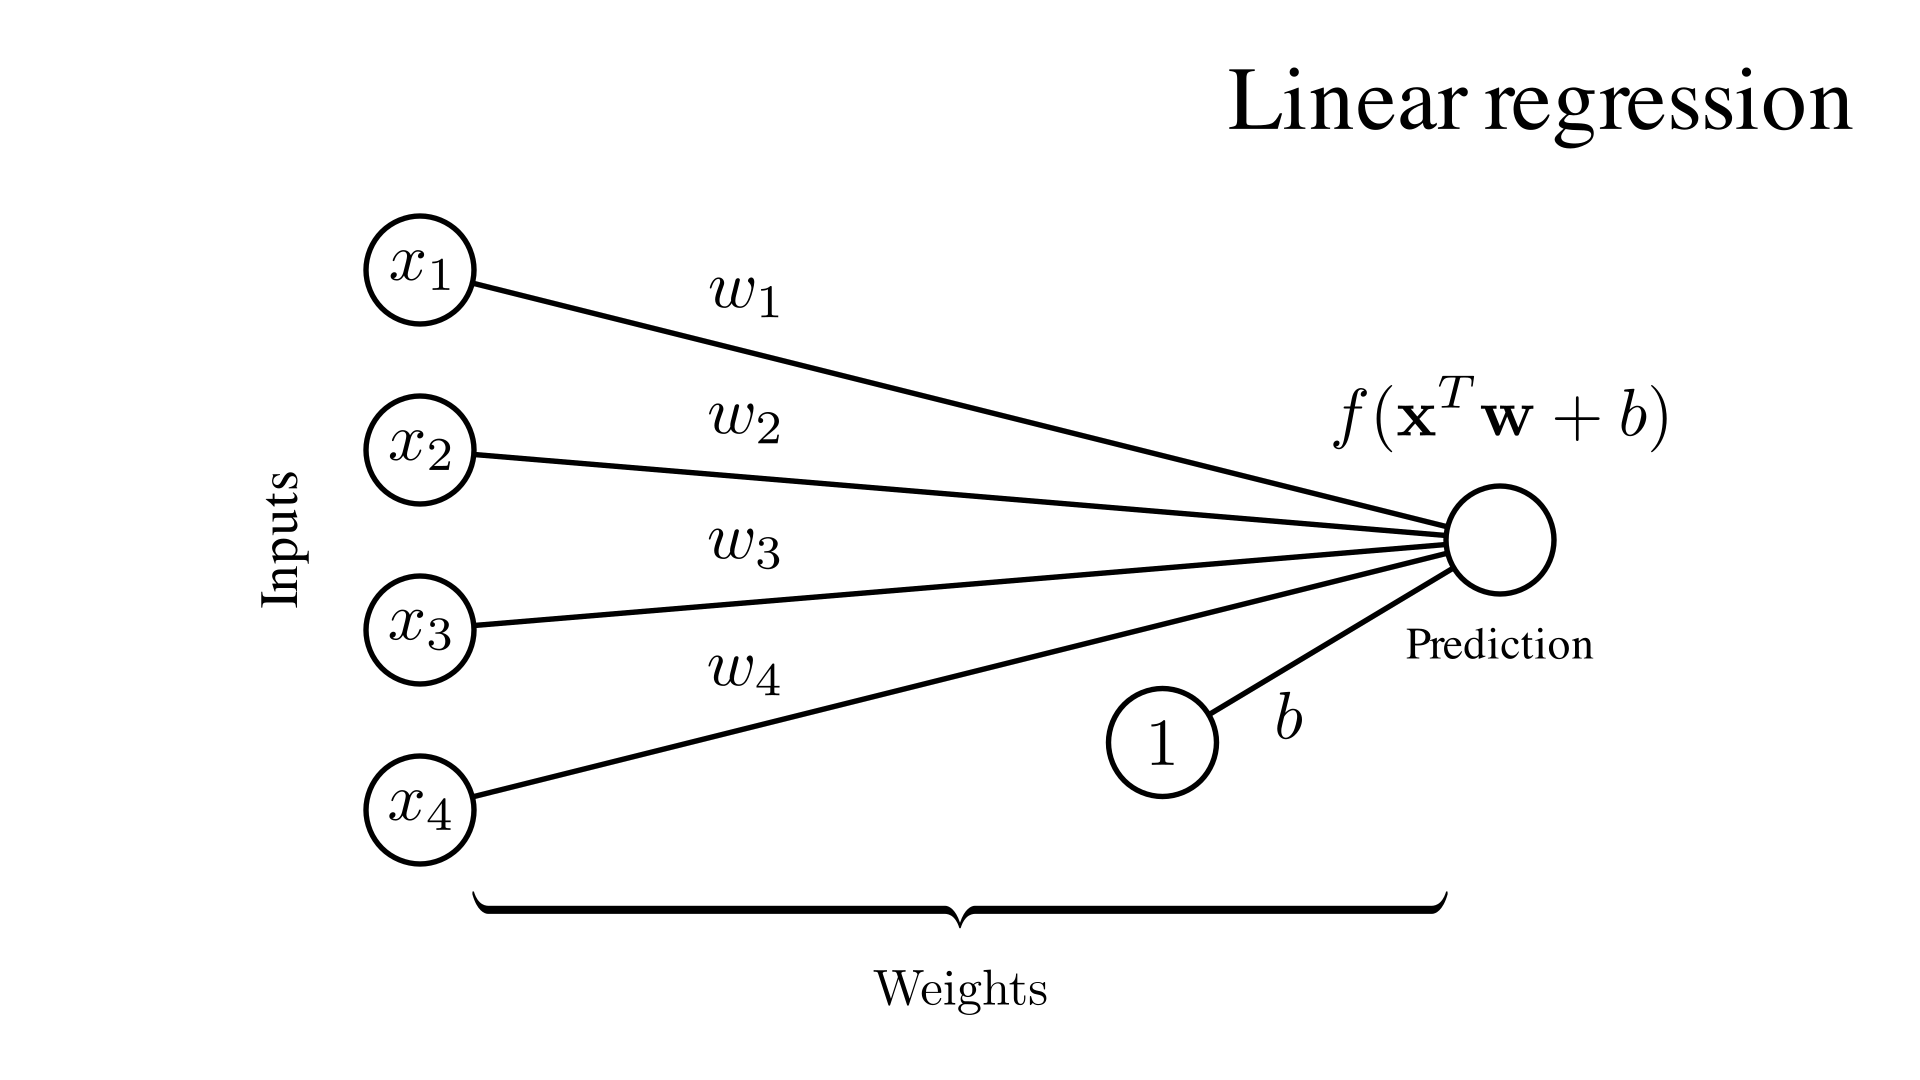

In [230]:
%%manim -sqh -v CRITICAL --progress_bar none Viz

class LectureScene(Scene):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.camera.background_color = "#ffffff"
        self.template = TexTemplate()
        self.template.add_to_preamble(r"\usepackage{amsmath}")

class Viz(LectureScene):
    def __init__(self, bias=True, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.bias = bias
        self.title = 'Linear regression'
        self.output = 'f(\mathbf{x}^T\mathbf{w} + b)'

    def construct(self):
        output = Circle(radius=0.4, color=BLACK).move_to((4, 0, 0))
        output_label = MathTex(self.output, color=BLACK).next_to(output, UP)
        output_label2 = Text('Prediction', color=BLACK).scale(0.5).next_to(output, DOWN)
        self.add(output, output_label, output_label2)
        for i, y in enumerate(np.linspace(2, -2, 4)):
            circle = Circle(radius=0.4, color=BLACK, fill_color=WHITE).move_to((-4, y, 0))
            label = MathTex('x_%d' % (i + 1), color=BLACK).move_to((-4, y, 0))
            line = Line(circle.get_center(), output.get_center(), color=BLACK, path_arc=0)
            line.set_length(line.get_length() - 0.8)
            point = 0.3 * (output.get_center() - circle.get_center()) + circle.get_center()
            line_label = MathTex('w_%d' % (i + 1), color=BLACK).next_to(point, UP)
            self.add(circle, label, line, line_label)

        brace = Brace(line, color=BLACK).shift(0.5 *  DOWN)
        bracetext = brace.get_text("Weights").set_color(BLACK).scale(0.75)
        input_text = Text('Inputs').scale(0.6).rotate(PI / 2).move_to((-5, 0, 0)).set_color(BLACK)
        title = Text(self.title, color=BLACK).to_corner(UR)
        self.add(brace, bracetext, input_text, title)

        if self.bias:
            circle = Circle(radius=0.4, color=BLACK).move_to((1.5, -1.5, 0))
            line = Line(circle.get_center(), output.get_center(), color=BLACK, path_arc=0)
            line.set_length(line.get_length() - 0.8)
            bias_text = MathTex('b', color=BLACK).next_to(circle).shift(UR * 0.2)
            bias_label = MathTex('1', color=BLACK).move_to(circle.get_center())
            self.add(circle, line, bias_text, bias_label)
